In [11]:
%load_ext autoreload
%autoreload 2
import sys, os, platform
import os
import sys
module_path = os.path.abspath(os.path.join('../spectraltree'))
if module_path not in sys.path:
    sys.path.append(module_path)
#sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'spectraltree'))
#sys.path.append(os.path.join(sys.path[0],'spectraltree'))
import reconstruct_tree as rt
import utils
import generation
import compare_methods
import numpy as np
from dendropy.interop import raxml
from dendropy.model.discrete import simulate_discrete_chars, Jc69
from dendropy.calculate.treecompare import symmetric_difference

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
m = 32
#tree = unrooted_birth_death_tree(birth_rate=4., death_rate=0, num_total_tips=m)
tree = utils.unrooted_pure_kingman_tree(utils.default_namespace(m), m)
tree_list = [tree]
jc = generation.Jukes_Cantor()
delta_vec = np.linspace(0.5,0.6,3)
NJ = rt.NeighborJoining(rt.JC_similarity_matrix)
SNJ = rt.SpectralNeighborJoining(rt.JC_similarity_matrix)
methods = [NJ,SNJ]
mutation_rates = [jc.similarity2t(delta)  for delta in delta_vec]
Ns = np.linspace(100,200,10).astype(int)
results = compare_methods.experiment(tree_list = tree_list, sequence_model = jc, Ns = Ns, methods=methods, mutation_rates = mutation_rates, reps_per_tree=1)



==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 1 trees
	 10 sample sizes: 100 111 122 133 144 155 166 177 188 200
	 2 methods <reconstruct_tree.NeighborJoining object at 0x7f60cd02b240> <reconstruct_tree.SpectralNeighborJoining object at 0x7f60cd01e6d8>
	 3 mutation rates: 0.1733 0.1495 0.1277
	 1 reps
1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60
60 / 60


NameError: name 'results2frame' is not defined

n
100    6
111    6
122    6
133    6
144    6
155    6
166    6
177    6
188    6
200    6
Name: F1%, dtype: int64


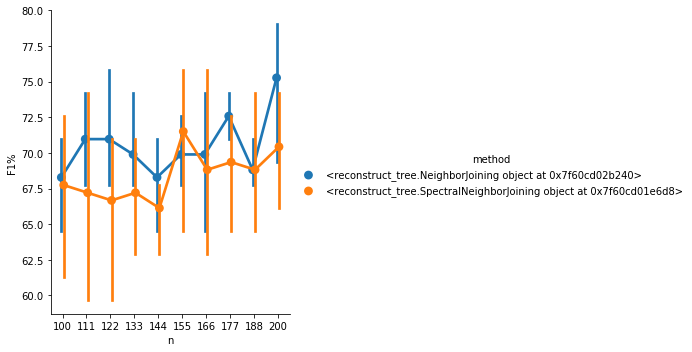

In [14]:
compare_methods.accuracy(compare_methods.results2frame(results))